## Converting PDF to .TXT

In [1]:
!pip install PyPDF2
!pip install nltk
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00


In [2]:
# importing required modules
from PyPDF2 import PdfReader
novel = []
# creating a pdf reader object
reader = PdfReader('/content/drive/MyDrive/NLP_assignment_1/Treasure Island Author Robert Louis Stevenson.pdf')

# printing number of pages in pdf file
for page in range(len(reader.pages)):
  page = reader.pages[page]

  # extracting text from page
  text = page.extract_text()
  novel.append(text)
novel_text = '\t'.join(novel)

In [3]:
# Specify the file path and name
file_path = "/content/drive/MyDrive/NLP_assignment_1/Novel_book.txt"

# Open the file in write mode ('w')
with open(file_path, 'w', encoding='utf-8') as file:
    # Getting the text from txt file
    file.write(novel_text)

## Reading from .txt file

In [4]:
f1 = open(file_path, 'r', encoding='utf-8')
novel_text = f1.read()

text contains the file in `str` format

In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud
from nltk.metrics.distance import jaccard_distance

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 1. Text Preprocessing

In [6]:
# Remove chapter headings
text = re.sub(r'Chapter \d+', '', novel_text)

# Remove pictures and tables
text = re.sub(r'\[Image.*?\]', '', novel_text)

# Remove extra whitespaces and newline characters
text = re.sub(r'\s+', ' ', novel_text).strip()

## 2. Tokenization and Removal of Stopwords

### 2.1 Tokenization of novel

In [7]:
# Tokenize the text
tokens = word_tokenize(text)

In [8]:
len(tokens)

84387

A look at a few tokenized words

In [9]:
tokens[:6]

['TREASURE', 'ISLAND', 'BY', 'ROBERT', 'LOUIS', 'STEVENSON']

### 2.2 Removal of Stopwords

In [10]:
stop_words = set(stopwords.words('english')) # Taken english as it is the language of our novel.
tokens_processed = [word for word in tokens if word.lower() not in stop_words]

In [11]:
len(tokens_processed)

47727

## 3. Frequency Distribution

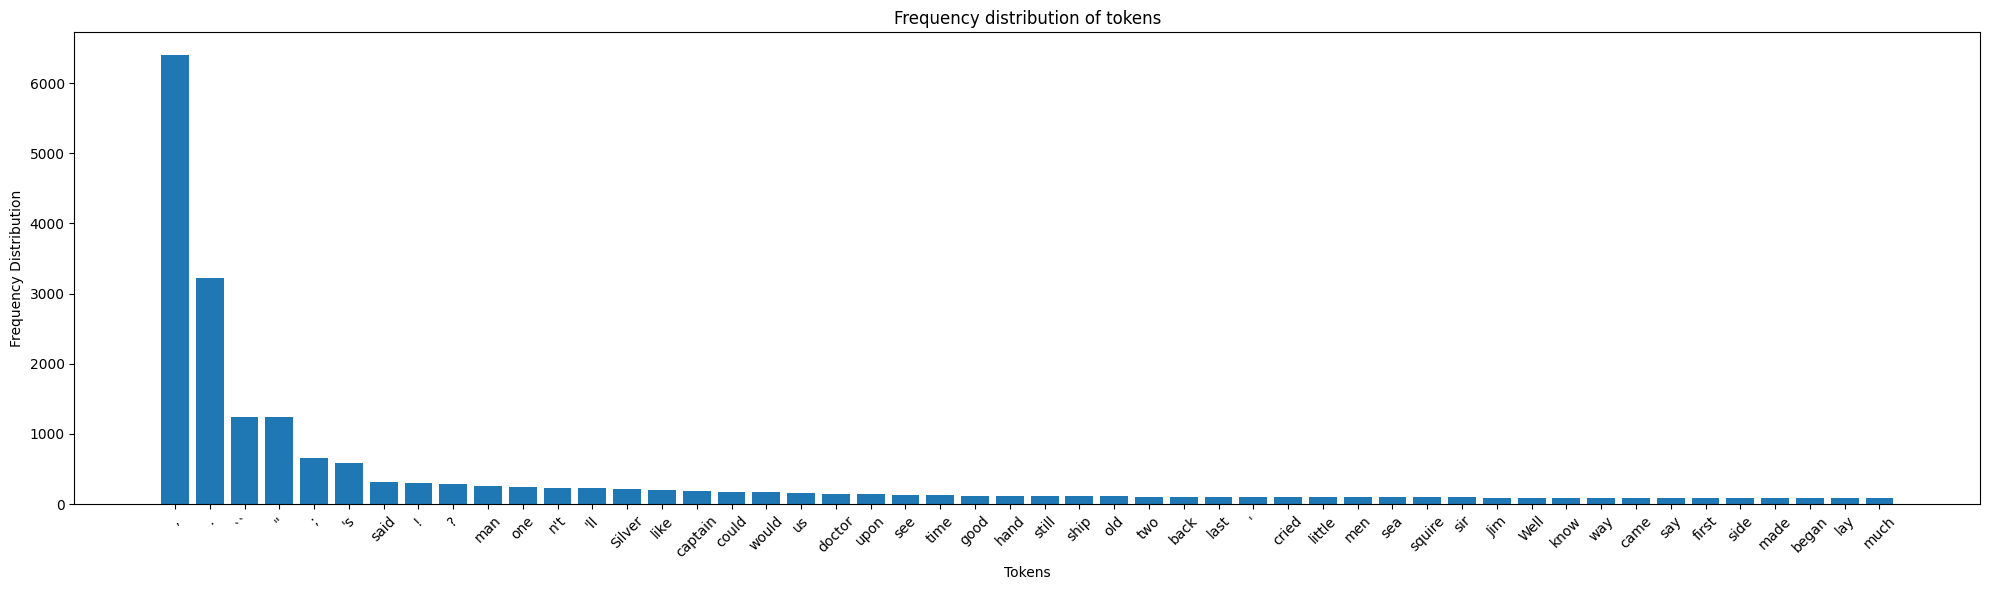

In [12]:
# Calculate frequency distribution
freq_dist = FreqDist(tokens_processed)

# As there are over 1 Lakh tokens, Plotting the top 50 tokens for an overview
tokens, frequencies = zip(*freq_dist.most_common(50))

# Bar graph of frequency distribution
plt.figure(figsize=(20, 6))
plt.bar(tokens, frequencies)

# Customizing labels and titles
plt.title('Frequency distribution of tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency Distribution')

# For better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. WordCloud

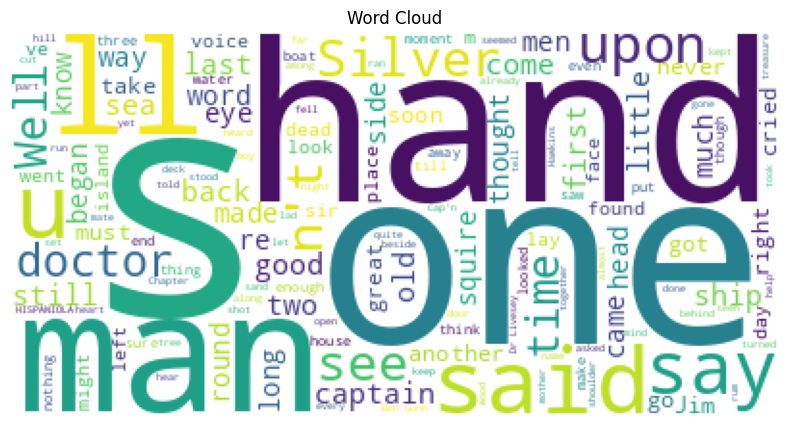

In [13]:
wordcloud = WordCloud(background_color='White').generate(' '.join(tokens_processed))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('Word Cloud')
plt.axis("off")
plt.show()

## 5. POS Tagging using Penn Bark

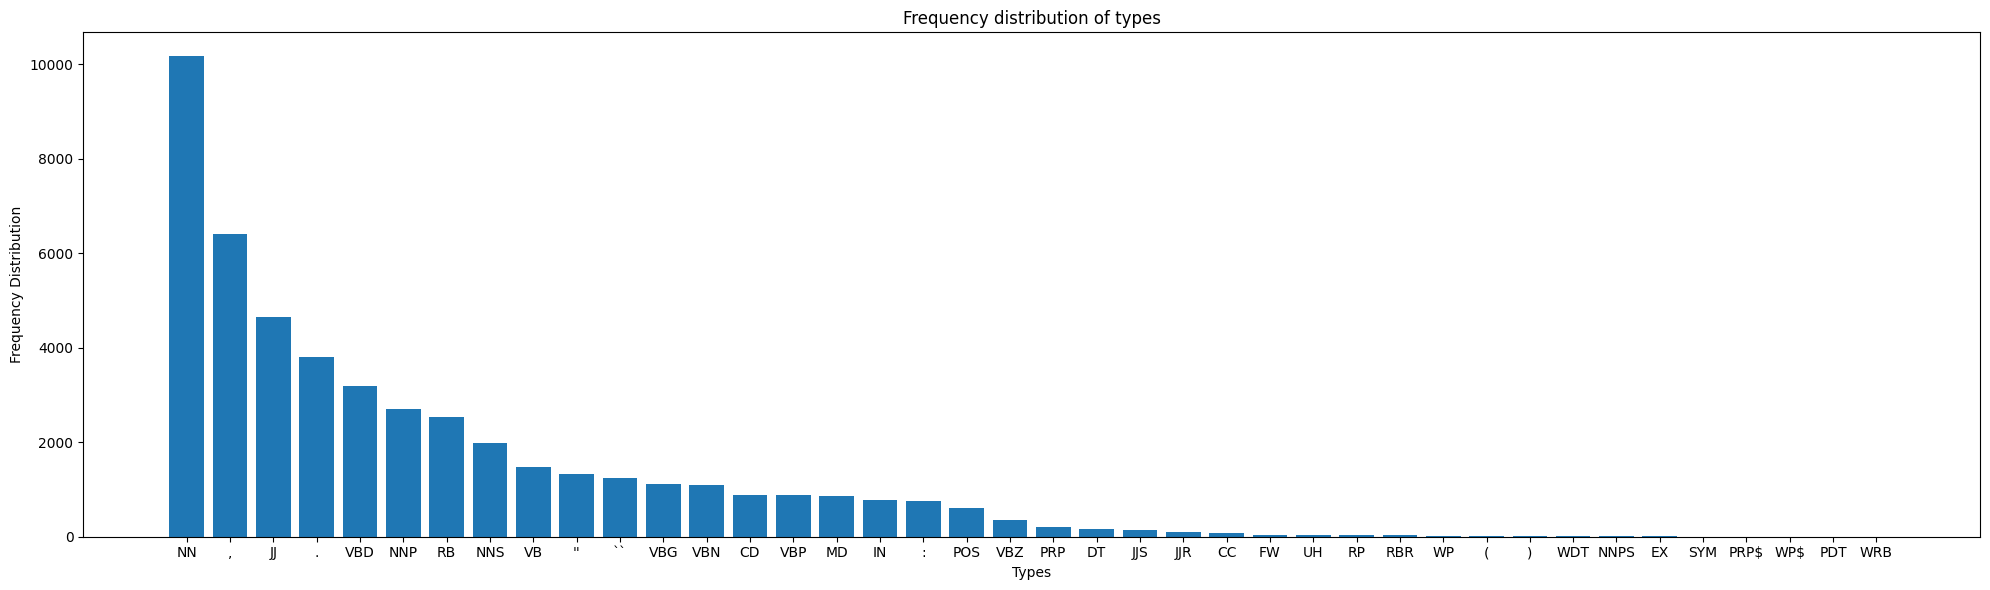

In [14]:
# PoS tagging using Penn Bark tagset (Default)
pos_tags = pos_tag(tokens_processed)

# Distribution of various tags
tag_distribution = nltk.FreqDist(tag for word, tag in pos_tags)

types, frequencies = zip(*tag_distribution.most_common())

# Code to plot a bar graph of frequency distribution
plt.figure(figsize=(20, 6))
plt.bar(types, frequencies)

# Customize labels and titles
plt.title('Frequency distribution of types')
plt.xlabel('Types')
plt.ylabel('Frequency Distribution')

# For better readability
plt.tight_layout()
plt.show()

## 6. Bi-Gram Probability Table

Getting a list of all chapters in the Novel and selecting the largest chapter

In [15]:
chapters = novel_text.split('CHAPTER ')
max_len = 0
chap_num = 0
for chap in range(len(chapters)):
  if len(chapters[chap]) > max_len:
    max_len = len(chapters[chap])
    chap_num = chap

largest_chapter = chapters[chap_num]
print('Largest Chapter Number : ',chap_num+1)

Largest Chapter Number :  20


Performing and plotting Bi-Gram Probability Table

In [16]:
from nltk import bigrams
import pandas as pd

def bi_gram_pairs(chapter):

  # Removing extra special characters
  special_char = ['"',"'",':',';','/','~','`',"''","``"]

  # Processing lchapter tokens for stop words
  chapter_tokens_processed = [word for word in chapter if word not in special_char]

  # Calculate bi-grams for chapter C
  bi_grams = list(bigrams(chapter_tokens_processed))

  return bi_grams


# Tokenize chapter C text
lchapter_tokenized = word_tokenize(largest_chapter)

# Calculate bi-gram probability distribution for chapter C
bi_gram_freq_dist = nltk.FreqDist(bi_gram_pairs(lchapter_tokenized))

Calculation Bi-Gram Probability and creating a table

In [17]:
import pandas as pd
prev_word, next_word, prob = [],[],[]
bi_gram_probabilities = {}
for item in bi_gram_freq_dist.items():
  if item[1]>=1 and lchapter_tokenized.count(item[0][0])>1:
    if round(item[1]/lchapter_tokenized.count(item[0][0]),2) != 0:
      prev_word.append(item[0][0])
      next_word.append(item[0][1])
      probability = round(item[1]/lchapter_tokenized.count(item[0][0]),2)
      prob.append(probability)
      bi_gram_probabilities[(item[0][0],item[0][1])] = probability
bi_gram_prob_data = pd.DataFrame(data={'Previous word':prev_word,
                                       'Next Word':next_word,
                                       'Bi-Gram Probability':prob})
bi_gram_table = bi_gram_prob_data.sort_values(by='Bi-Gram Probability', ascending=False)

In [18]:
bi_gram_table

,Previous word,Next Word,Bi-Gram Probability
559,near,the,1.00
2276,block,house,1.00
2227,clap,you,1.00
490,surface,of,1.00
1076,ca,n't,1.00
...,...,...,...
590,a,sound,0.01
90,and,here,0.01
1728,and,his,0.01
597,I,thought,0.01


## 7. Shannon Game with Chapter 4

The Shannon game is a thought experiment in information theory that has been applied to natural language processing (NLP) to study the fundamental limits of compression and representation of linguistic structures. In the context of NLP, the Shannon game has been used to explore the trade-offs between the complexity of linguistic models and their ability to capture linguistic structure. By analyzing the Shannon game, researchers can gain insights into the cognitive and computational processes underlying language use and acquisition.

The Shannon Game, a demonstration of entropy in human language, asks a player to guess the next letter or the next word in series. In this project, we use techniques of natural language processing to implement a word prediction algorithm based on probabilities extracted from large samples of written text. The computer should be able to predict the last word in a one, two, three, or four word phrase.

In [20]:
#Getting a random Chapter
import random
np.random.seed(2)
chapter = re.sub(r"\n",' ',chapters[random.randint(0,len(chapters)-1)])
import random

def predict_next_word(context,bi_grams):
        next_words = []
        for bi_gram in bi_grams:
            if bi_gram[0] == context:
              next_words.append(bi_gram[1])
        if next_words == []:
          return ''
        return random.choice(next_words)

def play(corpus):
      #context = random.choice(corpus)
      context = corpus[0]
      shannon_play = context
      words_remaining = len(corpus)
      while words_remaining >0:
          next_word = predict_next_word(context=context,bi_grams=bi_grams)

          shannon_play += " " + next_word
          context = next_word
          words_remaining-=1
      return shannon_play


bi_grams = bi_gram_pairs(word_tokenize(chapter))
shannon_play_created_chapter = play(word_tokenize(chapter))

In [21]:
shannon_play_created_chapter

"6 . First of us go with bookcases and Spanish moneys to explain the end of seal the sand- hill in the doctor , and stiff and the doctor . Mr. Dance , you might make a traveller . Jim is in rank . On the end of an Englishman . And good wind brings you here in , Livesey had been sealed paper . Mr. Dance told his own close -cropped black crag with a pen in the afternoon but money ? I made a sidetable , as in rank . What good wind brings you and take you will that he had kindly motioned me to sleep at one in the stitches with latitude and thin , but money . But the face on a hill in the squire . I ca n't make a date , and told his treasure amount to enjoy the grave . But the spot , sir , as if I 'm afraid of it . and drake with his medical scissors . Right ! and the doctor I had he had written this last dismissed . And so prodigiously afraid of a sealed paper had got itt was , had written this paper . And good evening with his long ago . Right ! cried Bravo ! He was some scraps of course 

In [22]:
chapter

'6. THE CAPTAIN \'S PAPERS     WE rode hard all the way till we drew up before Dr. Livesey\'s door. The  house was all dark to the front.   Mr. Dance told me to jump down and knock, and Dogger gave me a  stirrup to descend by. The door was opened almost at once by the maid.   "Is Dr. Livesey in?" I asked.   No, she said, he had come home in the afternoon but had gone up to the hall to dine and pass the evening with the squire.   "So there we go, boys," said Mr. Dance.   This time, as the distance was short, I did not mount, but ran with Dogger\'s stirrup -leather to the lodge gates and up the long, leafless,  moonlit avenue to where the white line of the hall buildings looked on  either hand on great old gardens. Here Mr. Dance dismounted, and taking me along with him, was admitted at a word into the house.   The servant led us down a matted passage and showed us at the end into a great library, all lined with bookcases and busts upon the top of them,  where the squire and  Dr. Livesey

## 8. Accuracy test of Shannon Game

In [31]:
def calculate_jaccard_similarity(text1, text2):
  """Calculates the Jaccard similarity between two texts."""

  # Preprocess the texts.
  text1 = re.sub(r"[^\w\s]", "", text1)
  text2 = re.sub(r"[^\w\s]", "", text2)

  # Tokenize the texts.
  tokens1 = set(word_tokenize(text1))
  tokens2 = set(word_tokenize(text2))

  # Calculate the Jaccard similarity between the two sets of tokens.
  jaccard_similarity = 1 - jaccard_distance(tokens1, tokens2)

  return jaccard_similarity

similarity_score = calculate_jaccard_similarity(chapter,shannon_play_created_chapter)
print(f"Similarity score between Shannon play game and original chapter is : {similarity_score}")

Similarity score between Shannon play game and original chapter is : 0.7163029525032092
